In [1]:
import struct
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install openpyxl


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas  as pd
import numpy   as np
import seaborn as sns

In [3]:
source_data = pd.read_excel("ID_data_mass_18122012.xlsx", sheet_name="VU")
source_data.head()

,№,дд.мм.гггг,Глубина манометра м,Dшт мм,"Руст, бара","Рзаб, бара","Pлин, бара","Руст, бар","Рзаб, бар","Рлин, бар",...,Рпл. Тек (Карноухов) МПа,Pсб атм,Pсб бар,Ro_g кг/м3,Ro_c кг/м3,Ro_w кг/м3,Удельная плотность газа б/р,G_total кг/с,КГФ г/м3,КГФ т/тыс.м3
0,804,2008-06-05,3576.3,7.94,249.6,370.1,101.8,249.0,359.6,101.8,...,-,93.6,92.376018,0.806017,801.0,1000.0,0.669449,2.782623,311.9094,NaN
1,804,2008-06-06,3576.3,9.53,233.5,364.6,101.3,231.0,338.1,102.4,...,-,92.9,91.685171,0.806017,801.0,1000.0,0.669449,3.697781,288.6003,NaN
2,804,2008-06-07,3576.3,11.11,213.4,357.1,101.6,211.0,314.8,100.6,...,-,91.4,90.204787,0.806017,801.0,1000.0,0.669449,4.515073,248.7906,NaN
3,804,2008-06-08,3576.3,12.70,191.6,347.4,98.4,187.0,291.5,99,...,-,89.2,88.033555,0.806017,801.0,1000.0,0.669449,5.217673,223.5591,NaN
4,804,2008-06-09,3576.3,14.29,171.9,337.7,99.2,169.0,270.3,99.5,...,-,89.7,88.527017,0.806017,801.0,1000.0,0.669449,5.765092,215.1486,NaN


In [4]:
source_data.describe()

,№,Dшт мм,"Руст, бара","Руст, бар","Туст, С",Стандартные условия Дебит газа 1000 м3/сут,Стандартные условия Дебит ст. конд. м3/сут,Стандартные условия Дебит воды м3/сут,Нэф м,Pсб атм,Pсб бар,Ro_g кг/м3,Ro_c кг/м3,Ro_w кг/м3,Удельная плотность газа б/р,G_total кг/с,КГФ г/м3,КГФ т/тыс.м3
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,178.000000,178.000000,23.000000,93.000000,23.0,93.000000,23.000000,23.000000,70.00000
mean,19456.291892,10.997405,229.597848,228.768131,55.284865,382.870055,114.397308,2.407085,48.478223,94.987597,93.745470,0.807631,780.847527,1000.0,0.665260,5.742359,265.028478,0.18090
std,6543.332900,2.493816,48.864049,48.902445,10.959738,153.070183,58.848155,2.273610,12.325657,5.347800,5.277868,0.015076,62.795111,0.0,0.020485,2.112717,40.997125,0.03038
min,804.000000,6.350000,111.100000,109.000000,24.200000,100.300000,26.200000,0.000000,22.100000,83.700000,82.605477,0.787416,186.000000,1000.0,0.570000,2.782623,199.627612,0.13100
25%,21002.000000,9.530000,200.000000,200.000000,48.200000,251.500000,72.700000,0.728749,43.000000,90.311538,89.130559,0.787416,782.000000,1000.0,0.660000,4.381813,237.545619,0.15700
50%,21303.000000,11.110000,232.000000,231.000000,56.500000,366.218938,98.200438,1.554165,45.200000,94.800000,93.560326,0.806017,787.000000,1000.0,0.667000,5.250915,255.681127,0.17900
75%,22501.000000,12.700000,260.305556,259.392000,64.000000,489.673000,142.148359,3.496397,62.572400,98.825000,97.532692,0.821344,793.700000,1000.0,0.679000,6.125723,288.891902,0.20000
max,22505.000000,17.460000,348.000000,348.000000,75.000000,846.816143,302.621077,11.222107,72.539800,106.600000,105.206020,0.824330,801.000000,1000.0,0.684660,10.931155,385.415949,0.27000


Произведём перевод в numeric величины, которые pandas сразу из-за строк таковыми не сделал.
Единственный тип, который оставим - дату.

In [5]:
df = source_data.copy()

for key in df.keys().values:
    column = df.get(key=key)

    if key != "дд.мм.гггг":
        column = pd.to_numeric(column, errors='coerce')

    df.pop(key)
    df[key] = column


In [6]:
df.describe()

,№,Глубина манометра м,Dшт мм,"Руст, бара","Рзаб, бара","Pлин, бара","Руст, бар","Рзаб, бар","Рлин, бар","Туст, С",...,Рпл. Тек (Карноухов) МПа,Pсб атм,Pсб бар,Ro_g кг/м3,Ro_c кг/м3,Ro_w кг/м3,Удельная плотность газа б/р,G_total кг/с,КГФ г/м3,КГФ т/тыс.м3
count,185.000000,181.000000,185.000000,185.000000,181.000000,178.000000,185.000000,181.000000,174.000000,185.000000,...,135.000000,178.000000,178.000000,23.000000,93.000000,23.0,93.000000,23.000000,23.000000,70.00000
mean,19456.291892,3565.568508,10.997405,229.597848,330.836999,97.588175,228.768131,328.707200,98.147579,55.284865,...,52.077037,94.987597,93.745470,0.807631,780.847527,1000.0,0.665260,5.742359,265.028478,0.18090
std,6543.332900,126.201874,2.493816,48.864049,63.501186,12.464947,48.902445,64.582742,9.800728,10.959738,...,5.952397,5.347800,5.277868,0.015076,62.795111,0.0,0.020485,2.112717,40.997125,0.03038
min,804.000000,3276.000000,6.350000,111.100000,169.250000,19.600000,109.000000,160.000000,40.739839,24.200000,...,41.600000,83.700000,82.605477,0.787416,186.000000,1000.0,0.570000,2.782623,199.627612,0.13100
25%,21002.000000,3548.500000,9.530000,200.000000,296.800000,94.925000,200.000000,293.900000,94.431548,48.200000,...,48.600000,90.311538,89.130559,0.787416,782.000000,1000.0,0.660000,4.381813,237.545619,0.15700
50%,21303.000000,3577.500000,11.110000,232.000000,338.830800,99.645512,231.000000,337.000000,99.400000,56.500000,...,50.700000,94.800000,93.560326,0.806017,787.000000,1000.0,0.667000,5.250915,255.681127,0.17900
75%,22501.000000,3653.000000,12.700000,260.305556,372.620000,103.167190,259.392000,372.100000,103.487823,64.000000,...,56.000000,98.825000,97.532692,0.821344,793.700000,1000.0,0.679000,6.125723,288.891902,0.20000
max,22505.000000,3952.000000,17.460000,348.000000,458.600000,121.682930,348.000000,458.500000,123.616800,75.000000,...,65.900000,106.600000,105.206020,0.824330,801.000000,1000.0,0.684660,10.931155,385.415949,0.27000


Объединим 'КГФ т/тыс.м3' и 'КГФ г/м3' столбцы в 'КГФ т/тыс.м3'

In [7]:
kgf_meters = df['КГФ г/м3']
kgf_meters = kgf_meters.fillna(0)
df['КГФ т/тыс.м3'] = df['КГФ т/тыс.м3'].fillna(0)
df['КГФ т/тыс.м3'] += kgf_meters / 1000

df = df.drop("КГФ г/м3", axis=1)

df['КГФ т/тыс.м3'] = df['КГФ т/тыс.м3'].replace(0, np.nan)

Напишем describe, рекомендованный Александром Владимировичем

In [8]:
C=len(df.columns)
L=len(df.index)
CN=df.count() #количество
NP=((L-CN)/L)*100 #процент пропущенных значений
MN=df.min() #минимум
Q1=df.quantile(q=0.25) #первый квартиль
MA=df.mean() #среднее значение
ME=df.median() #медиана
Q3=df.quantile(q=0.75) #третий квартиль
MX=df.max() #максимум
ST=df.std() #стандартное отклонение
P=df.nunique() #мощность
IQ=Q3-Q1 #интерквартильный размах

C:\Users\egork\AppData\Local\Temp\ipykernel_10520\386298352.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df.quantile(q=0.25) #первый квартиль
C:\Users\egork\AppData\Local\Temp\ipykernel_10520\386298352.py:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  MA=df.mean() #среднее значение
C:\Users\egork\AppData\Local\Temp\ipykernel_10520\386298352.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ME=df.median() #медиана
C:\Users\egork\AppData\Local\Temp\ipykernel_10520\386298352.py:9: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to 

In [9]:
frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame=frame.T
f=pd.DataFrame(frame)
f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1=f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
f1

,№,Глубина манометра м,Dшт мм,"Руст, бара","Рзаб, бара","Pлин, бара","Руст, бар","Рзаб, бар","Рлин, бар","Туст, С","Тна шлейфе, С",Тзаб С,Tлин С,Стандартные условия Дебит газа 1000 м3/сут,Стандартные условия Дебит ст. конд. м3/сут,Стандартные условия Дебит воды м3/сут,Дебит смеси 1000 м3/сут,Линейные условия Дебит гааз м3/сут,Линейные условия Дебит кон нестабильный м3/сут,Линейные условия Дебит воды м3/сут,Нэф м,Рпл. Тек (послед точка на КВД) МПа,Рпл. Тек (Расчет по КВД) МПа,Рпл. Тек (Карноухов) МПа,Pсб атм,Pсб бар,Ro_g кг/м3,Ro_c кг/м3,Ro_w кг/м3,Удельная плотность газа б/р,G_total кг/с,КГФ т/тыс.м3
Количество,185,181,185,185,181,178,185,181,174,185,123,181,178,185,185,185,176,178,178,178,185,177,158,135,178,178,23,93,23,93,23,93
Процент пропусков,0.000000,2.162162,0.000000,0.000000,2.162162,3.783784,0.000000,2.162162,5.945946,0.000000,33.513514,2.162162,3.783784,0.000000,0.000000,0.000000,4.864865,3.783784,3.783784,3.783784,0.000000,4.324324,14.594595,27.027027,3.783784,3.783784,87.567568,49.729730,87.567568,49.729730,87.567568,49.729730
Минимум,804,3276.000000,6.350000,111.100000,169.250000,19.600000,109.000000,160.000000,40.739839,24.200000,14.000000,100.210000,16.204686,100.300000,26.200000,0.000000,117.868700,755.630000,48.600000,0.000000,22.100000,23.780000,34.000000,41.600000,83.700000,82.605477,0.787416,186.000000,1000.000000,0.570000,2.782623,0.131000
Первый квартиль,21002.000000,3548.500000,9.530000,200.000000,296.800000,94.925000,200.000000,293.900000,94.431548,48.200000,32.050000,104.600000,32.471191,251.500000,72.700000,0.728749,267.758570,2013.207500,114.900000,0.825000,43.000000,36.990000,48.150000,48.600000,90.311538,89.130559,0.787416,782.000000,1000.000000,0.660000,4.381813,0.164000
Среднее,19456.291892,3565.568508,10.997405,229.597848,330.836999,97.588175,228.768131,328.707200,98.147579,55.284865,40.335772,105.304630,38.839565,382.870055,114.397308,2.407085,405.780555,3441.014650,177.871348,2.516854,48.478223,39.895667,51.279357,52.077037,94.987597,93.745470,0.807631,780.847527,1000.000000,0.665260,5.742359,0.201706
Медиана,21303.000000,3577.500000,11.110000,232.000000,338.830800,99.645512,231.000000,337.000000,99.400000,56.500000,38.500000,105.370000,39.396874,366.218938,98.200438,1.554165,388.149710,3041.244840,155.300000,1.700000,45.200000,39.440000,49.800000,50.700000,94.800000,93.560326,0.806017,787.000000,1000.000000,0.667000,5.250915,0.192000
Третий квартиль,22501.000000,3653.000000,12.700000,260.305556,372.620000,103.167190,259.392000,372.100000,103.487823,64.000000,46.100000,106.470000,46.474599,489.673000,142.148359,3.496397,509.218789,4194.625000,221.825000,3.500000,62.572400,42.980000,55.900000,56.000000,98.825000,97.532692,0.821344,793.700000,1000.000000,0.679000,6.125723,0.224000
Максимум,22505,3952.000000,17.460000,348.000000,458.600000,121.682930,348.000000,458.500000,123.616800,75.000000,110.200000,107.620000,55.513904,846.816143,302.621077,11.222107,896.908271,18965.000000,492.800000,11.400000,72.539800,53.270000,64.100000,65.900000,106.600000,105.206020,0.824330,801.000000,1000.000000,0.684660,10.931155,0.385416
Стандартное отклонение,6543.332900,126.201874,2.493816,48.864049,63.501186,12.464947,48.902445,64.582742,9.800728,10.959738,15.322736,1.394948,9.087249,153.070183,58.848155,2.273610,161.208785,2352.277677,91.250025,2.319031,12.325657,5.320672,5.724079,5.952397,5.347800,5.277868,0.015076,62.795111,0.000000,0.020485,2.112717,0.049254
Мощность,14,37,14,173,178,176,139,172,168,94,102,121,174,185,183,144,176,175,170,63,25,39,34,24,113,113,6,25,1,21,23,72


Удалим столбцы с большим процентом пропусков

In [10]:
for key in df.keys():
    if key != 'дд.мм.гггг' and key != 'КГФ т/тыс.м3' and key != 'G_total кг/с' and f[key].iloc[1] > 60:
        df.drop(key, inplace=True, axis=1)

Заполним пропуски средним значением

In [11]:
for key in df.keys().values:
    if key != 'дд.мм.гггг' and f[key].iloc[1] < 30 and f[key].iloc[1] > 0:
        df[key].fillna(f[key].iloc[4], inplace=True)

Проверим - все (0 < x < 30) зелёное

# GAIN RATIO

Gain ratio: GR(S) = InfoGain(S) / SplitInfo(S) - БРО

InfoGain(S, a) = H(S) - H(S|a)

H(S) - энтропия (самим реализовать)
H(S|a)   <----
             |
X = {x1, x2, ..., xs}

SplitInfo(S) = sum from i=1 to n {N(ti) / N (s)} * log2(N(ti) / N(S))
N - число уникальных вхождений конкретной фичи
НЕ БРО - Mutual info

## Правило Стёрджеса

Создадим фрэйм из интервалов -> переведём df из категориальных признаков

In [14]:
st_df = df.copy()

for key in st_df.keys():
    N = st_df[key].count()
    n = 1 + int(np.log2(N))
    st_df = st_df.sort_values(by=key)

    step = N // n

    for i in range(n):
        st_df.loc[i * step:(i + 1) * step, key] = i

## Функция энтропии

![title](entropy.png)

In [15]:
def entropy(S):
    unique, count = np.unique(S, return_counts=True)
    prob = count / np.sum(count)
    return -np.sum(prob * np.log2(prob))


## Энтропия от Y при X

![title](join_entropy.png)

In [16]:
def join_entropy(Y, X):
    unique, count = np.unique(X, return_counts=True)
    X_ = pd.DataFrame({'x' : unique, 'count_X' : count})


    YX = pd.DataFrame({'y' : Y, 'x' : X})
    YX = YX.groupby(['y', 'x']).size().reset_index().rename(columns={0:'count'})

    YX = YX.join(X_, how='inner', lsuffix='x', rsuffix='x')
    prob = (YX['count'] / np.sum(YX['count'])) / (YX['count_X'] / np.sum(YX['count_X']))

    return -np.sum(prob * np.log2(prob))

## Information Gain , Split Info и сам Gain Ratio

![title](info_gain.png)

In [17]:
def info_gain(Y, X) :
    return entropy(Y) - join_entropy(X, Y)


In [18]:
def split_info(a):
    return entropy(a)

In [19]:
def gain_ratio(S, a):
    #S.fillna(-1, inplace=True)
    #a.fillna(-1, inplace=True)
    return info_gain(S, a) / split_info(a)

In [46]:
indexes = st_df.keys().drop(["target", "№", "КГФ т/тыс.м3", "G_total кг/с"])
store = pd.DataFrame(columns=["target"], index=indexes)
st_df["target"] = st_df["КГФ т/тыс.м3"].astype(str) + ":" + st_df["G_total кг/с"].astype(str)
st_df["target"]

68     0.131:1.0
97     0.132:3.0
67     0.138:1.0
167    0.139:1.0
96     0.139:3.0
92      0.14:1.0
18     0.141:3.0
95     0.141:3.0
166    0.145:1.0
164    0.147:3.0
66     0.152:1.0
47     0.152:1.0
46     0.153:1.0
163    0.153:3.0
94     0.154:3.0
146    0.154:1.0
45     0.156:1.0
145    0.157:1.0
17     0.157:3.0
44      0.16:1.0
144    0.161:1.0
88     0.162:1.0
13       1.0:1.0
140      1.0:1.0
87       1.0:1.0
162      1.0:3.0
43       1.0:1.0
12       1.0:3.0
86       1.0:1.0
16       1.0:3.0
19       1.0:1.0
85       1.0:1.0
139      1.0:1.0
11       1.0:1.0
148      1.0:1.0
147      1.0:1.0
42       1.0:1.0
149      1.0:1.0
83       1.0:1.0
161      1.0:3.0
165      1.0:1.0
159      1.0:1.0
82       1.0:1.0
10       1.0:3.0
138      1.0:1.0
153      1.0:1.0
154      1.0:1.0
81       1.0:1.0
158      1.0:1.0
84       1.0:1.0
151      1.0:1.0
25       1.0:0.0
143      1.0:1.0
41       1.0:1.0
152      1.0:1.0
160      1.0:3.0
15       1.0:1.0
157      1.0:1.0
80       1.0:1

In [47]:
st_df['дд.мм.гггг'] = st_df['дд.мм.гггг'].astype(str)

Посчитаем и выведем gain ratio:

In [48]:
for a in st_df.keys():
    if a in indexes:
        store._set_value(a, "target", gain_ratio(st_df["target"].copy(), st_df[a].copy()))

<Axes: >

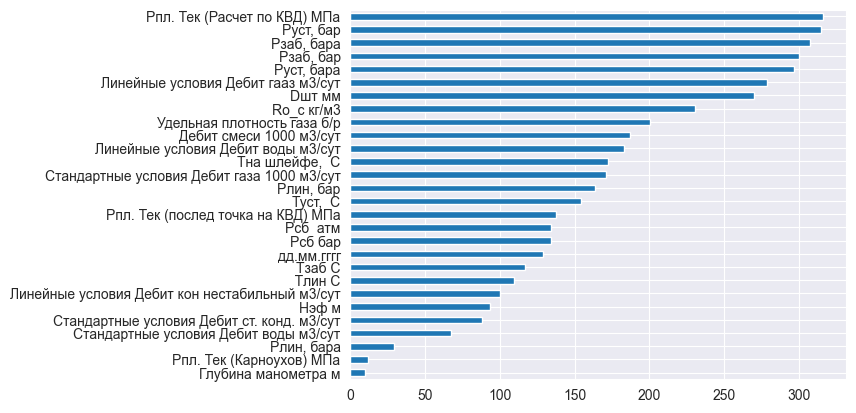

In [49]:
store['target'].sort_values().plot(kind='barh')

# Анализ распределений

In [60]:
import matplotlib.pyplot as plt

def distribution_visualizer():
    for key in df.keys():
        if key != 'дд.мм.гггг':
            plt.figure(key)
            sns.histplot(df[key], kde=True, stat="density")
            plt.axvline(f[key].iloc[3] - 1.5 * f[key].iloc[10], color="indigo", ls='--')  #q1-1.5*iqr
            plt.axvline(f[key].iloc[3], color="dodgerblue", ls='--')  #первый квартиль
            plt.axvline(f[key].iloc[4], color="red", ls='--')  #среднее
            plt.axvline(f[key].iloc[5], color="goldenrod", ls='--')  #медиана
            plt.axvline(f[key].iloc[6], color="dodgerblue", ls='--')  #третий квартиль
            plt.axvline(f[key].iloc[6] + 1.5 * f[key].iloc[10], color="indigo", ls='--')  #q3+1.5*iqr
            plt.show()


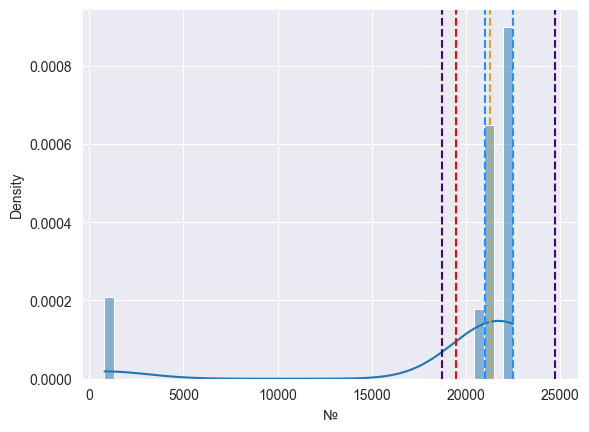

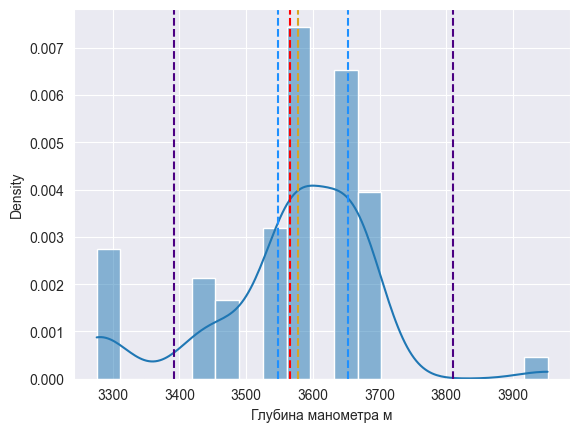

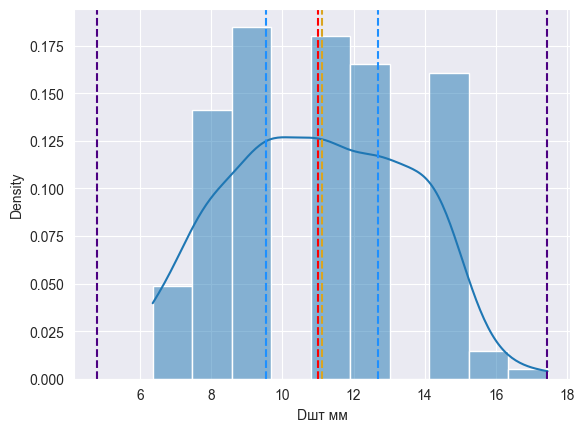

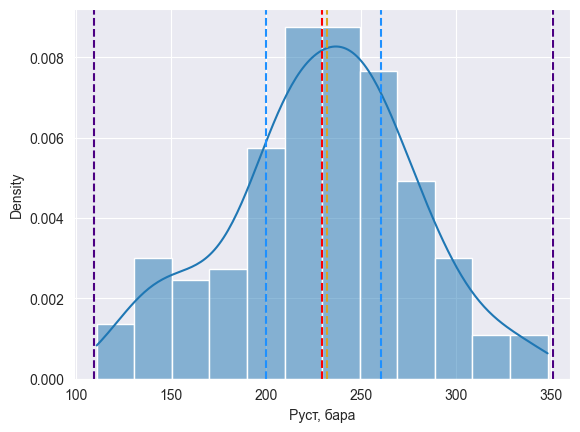

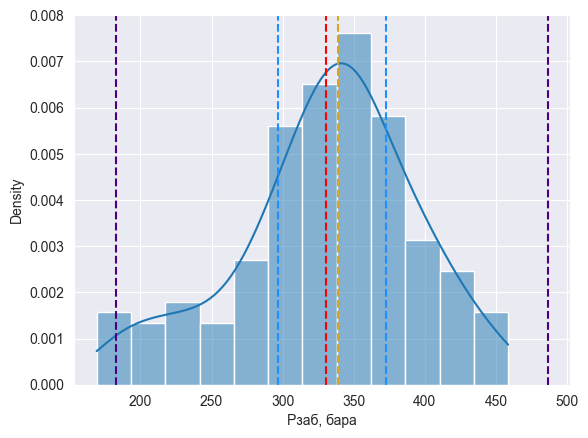

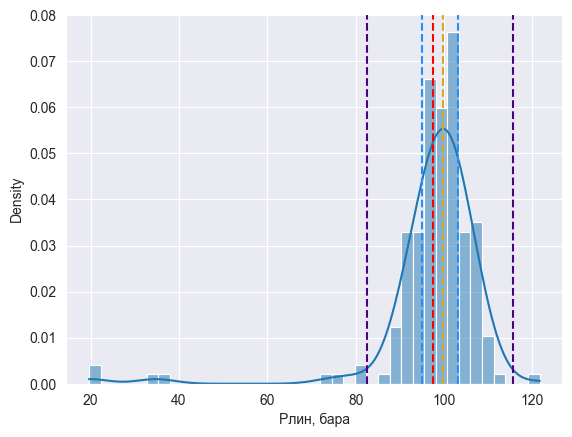

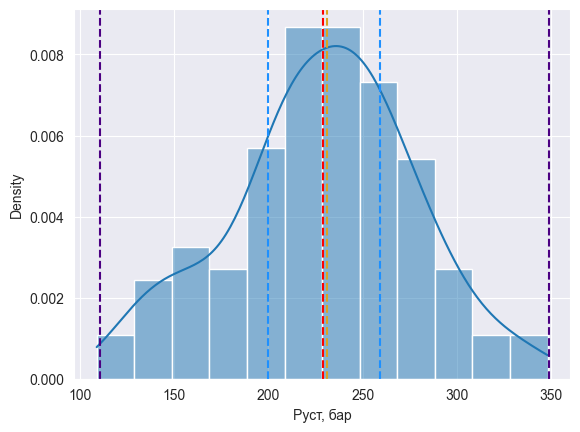

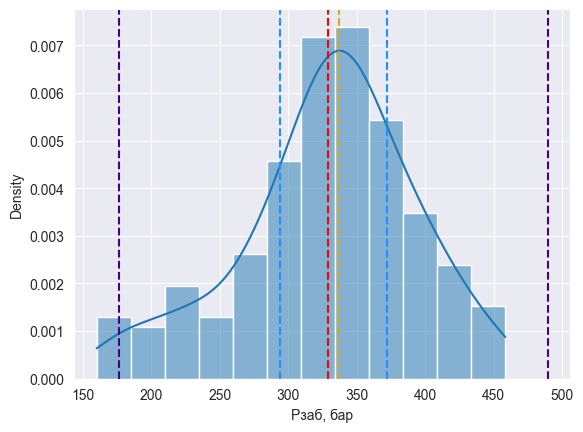

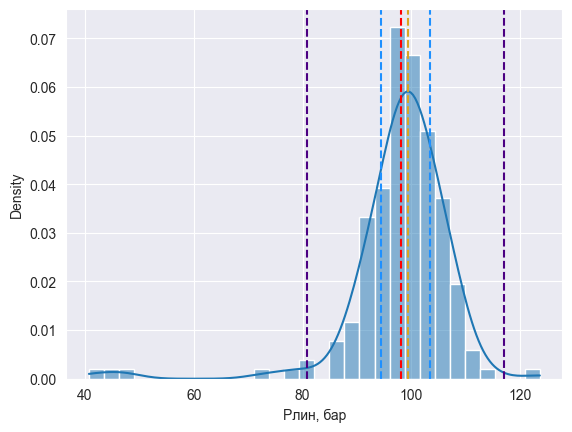

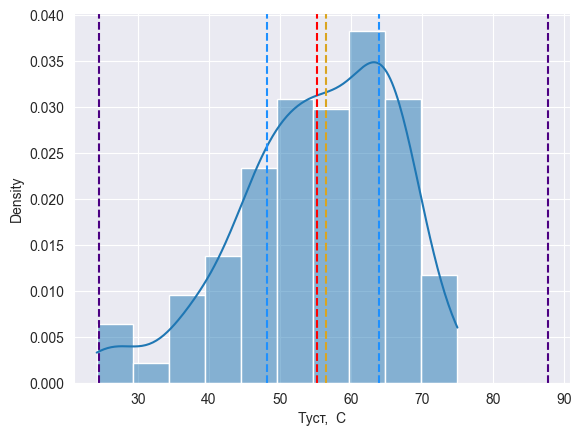

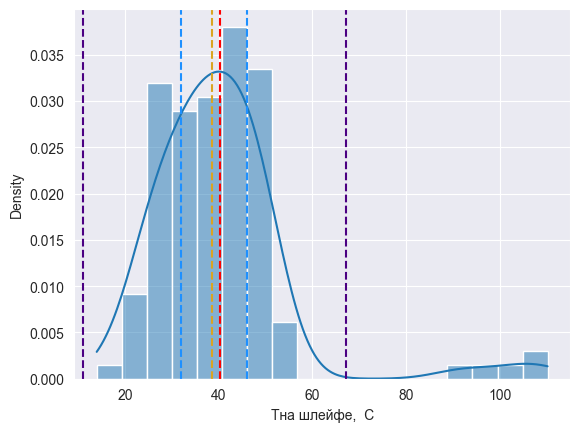

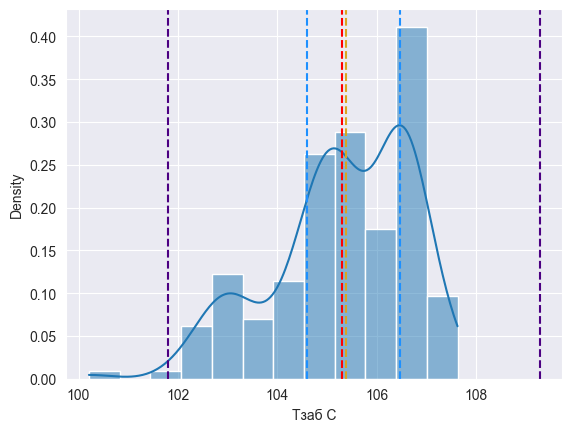

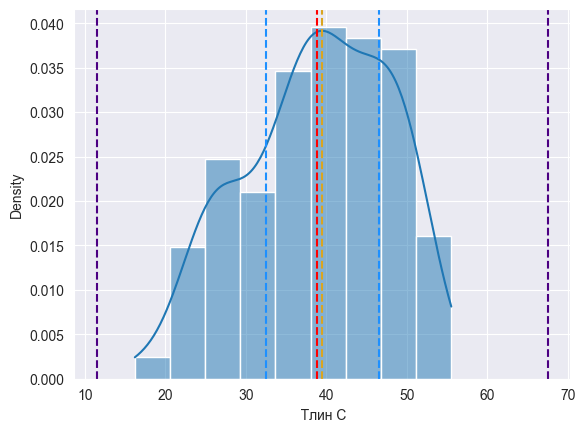

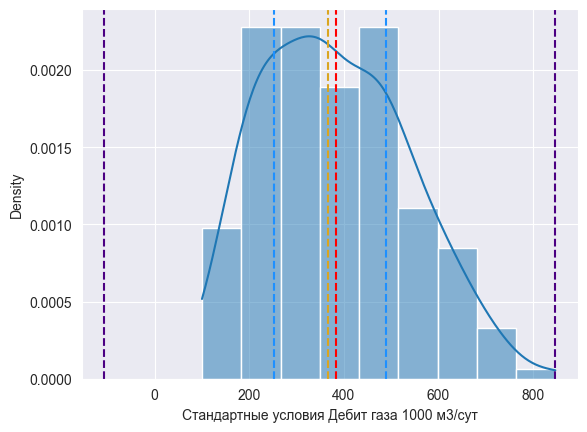

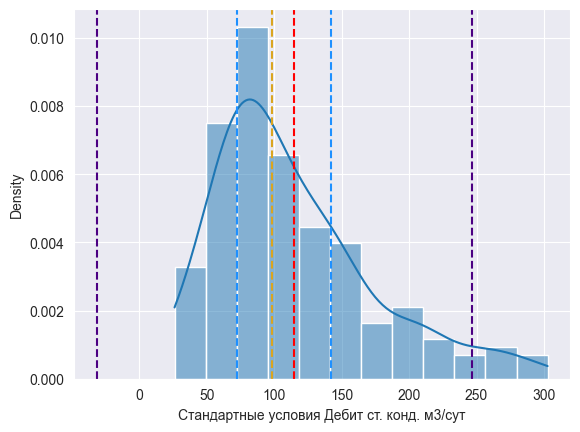

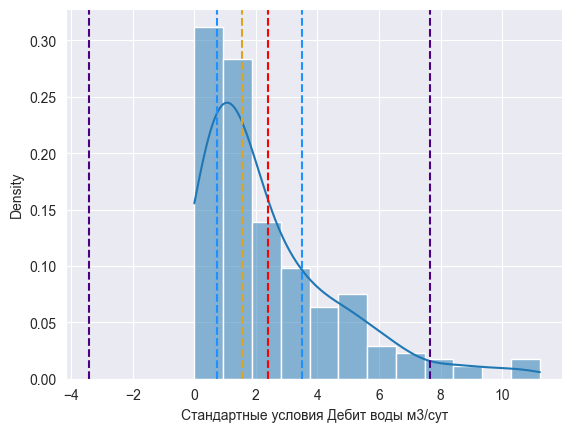

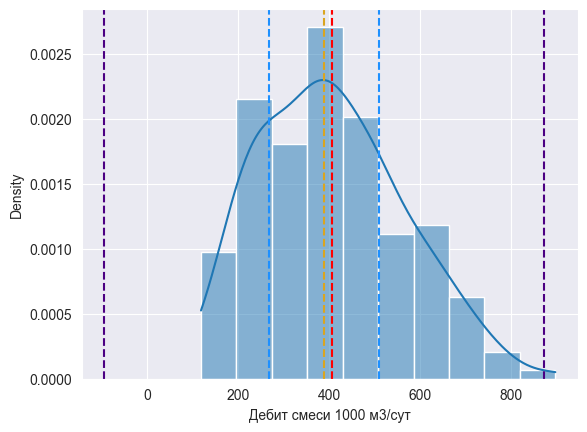

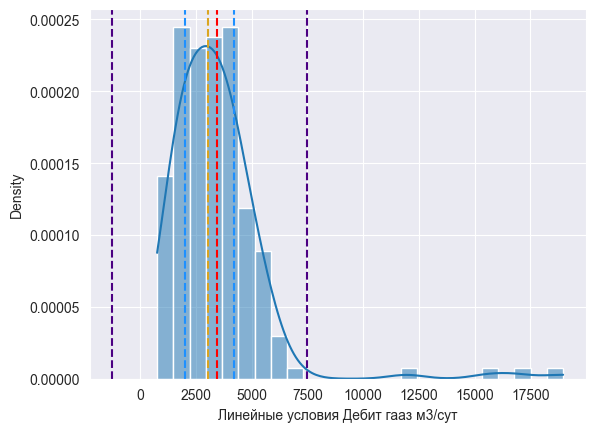

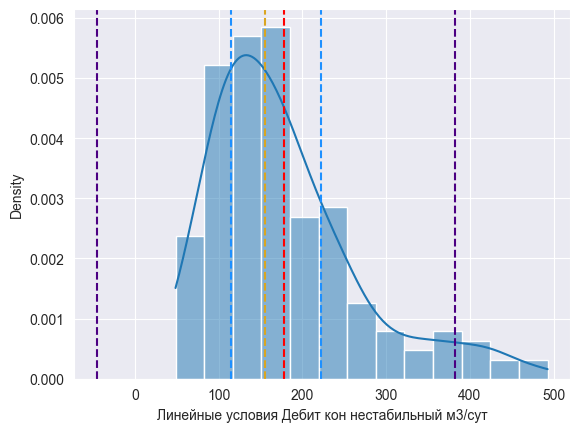

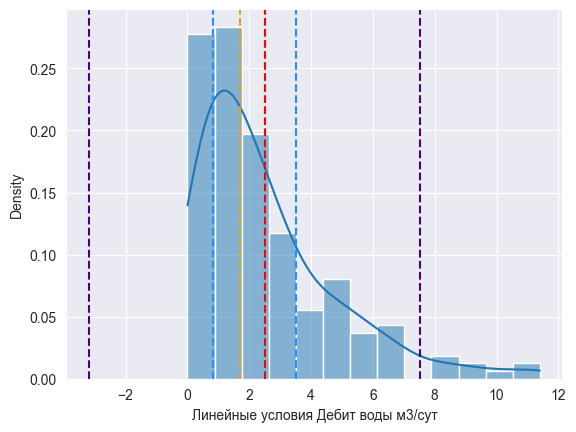

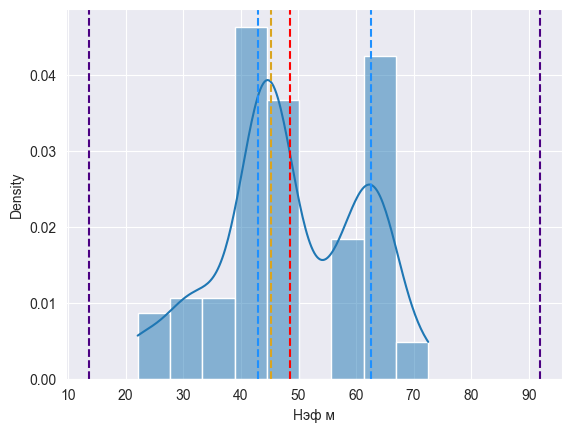

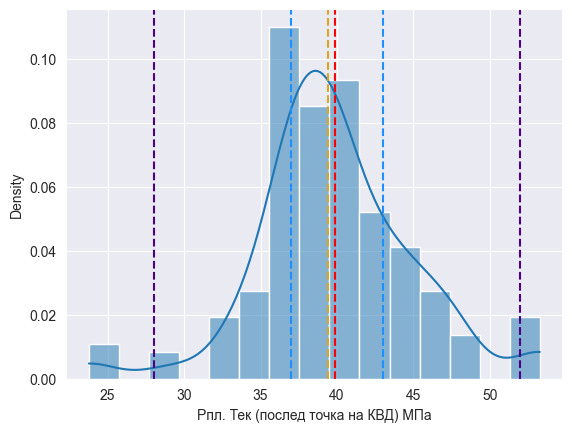

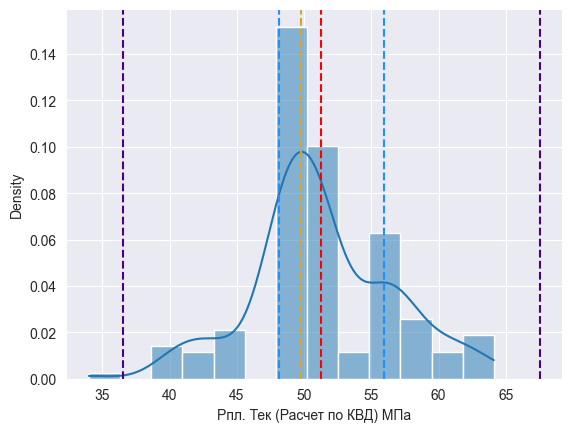

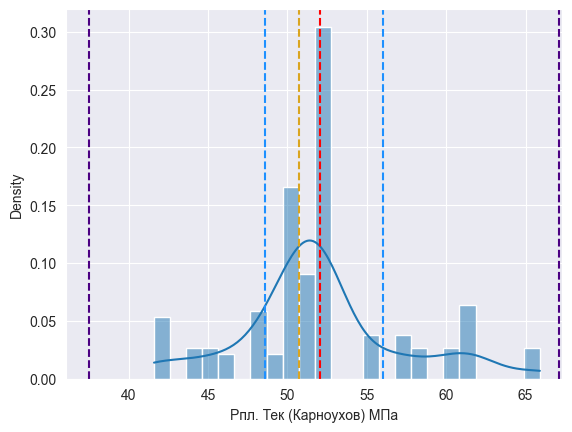

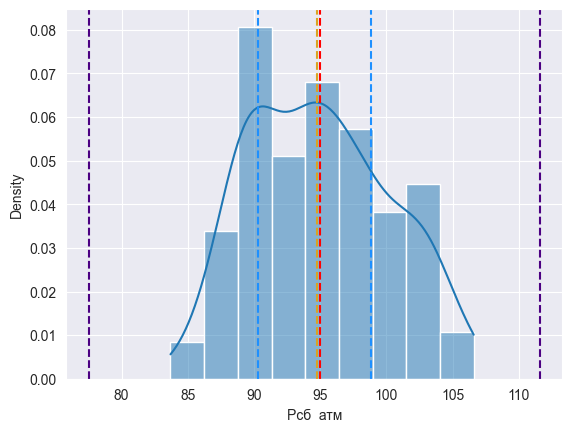

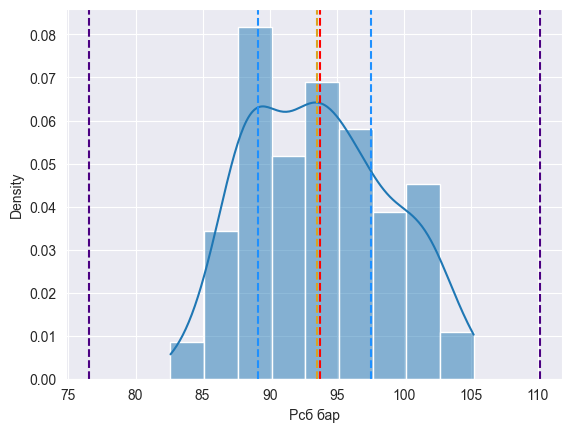

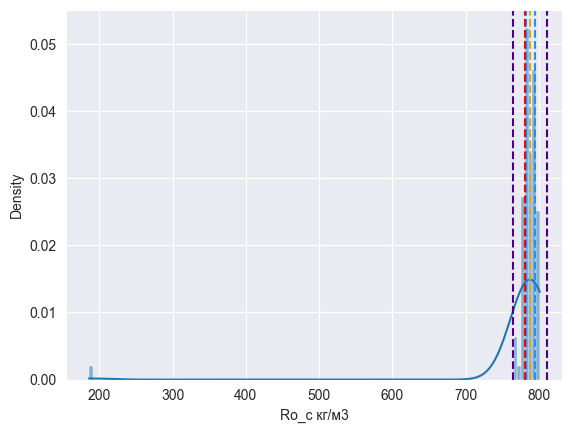

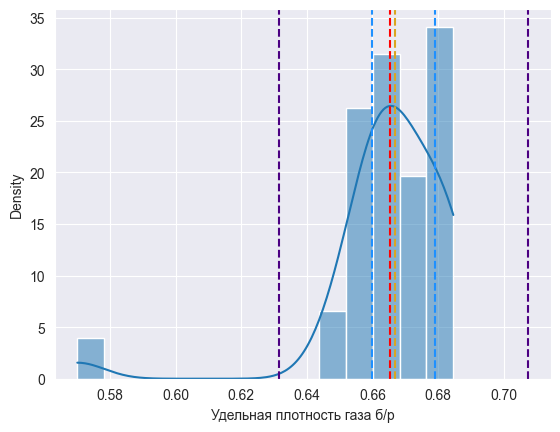

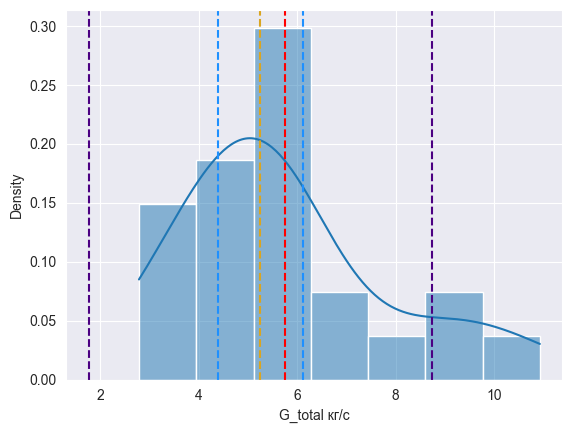

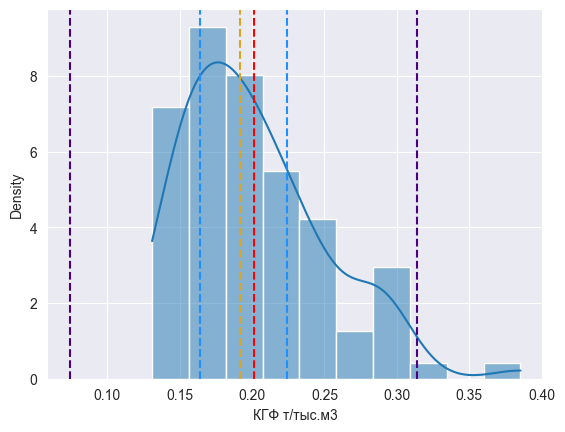

In [53]:
distribution_visualizer()

# Очистка выбросов.

После увиденного на графиках, можно заметить наличие выбросы:
* Ro_C[,250],
* Рлин_бар[,60],
* Рлин бара[,60],
* Удельная плотность газа б/р[0, 0.6],
* Линейные условия Дебит гааз м3/сут[10000, 0],
* Тна шлейфе,  С[80,]

In [56]:
def clear_outlier(df: pd.DataFrame, attr_name: str, target_names: list, lower: float, higher: float) -> pd.DataFrame:
    df_ = df[(~np.isnan(df[target_names]).all(axis=1)) | ((df[attr_name] >= lower) & (df[attr_name] <= higher) | np.isnan(df[attr_name]))]
    return df_

In [62]:
targets = ['КГФ т/тыс.м3', 'G_total кг/с']

attrs_to_clear = {
    'Ro_c кг/м3' : (-np.inf, 250),
    'Рлин, бар' : (0, 60),
    'Pлин, бара' : (0, 60),
    'Удельная плотность газа б/р' : (0, 0.6),
    'Линейные условия Дебит гааз м3/сут' : (10000, np.inf),
    'Тна шлейфе,  С' : (80, np.inf)
}

for attr_name in attrs_to_clear.keys():
    df = clear_outlier(
        df,
        attr_name,
        targets,
        attrs_to_clear[attr_name][0],
        attrs_to_clear[attr_name][1]
    )

### Проверим результат

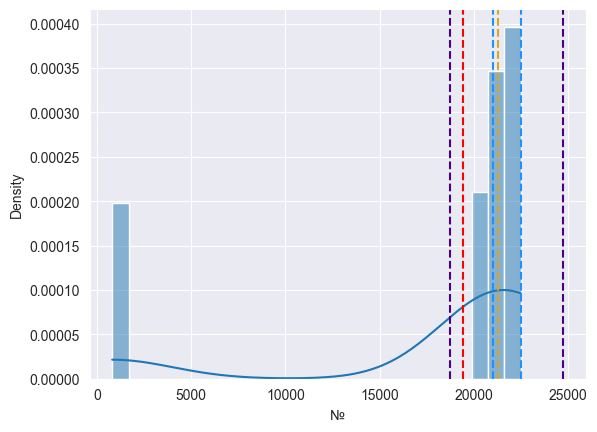

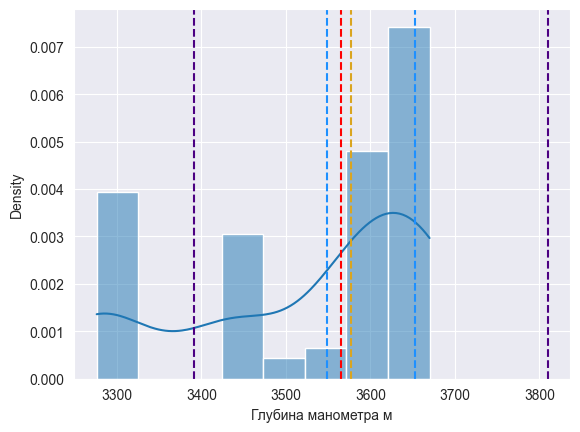

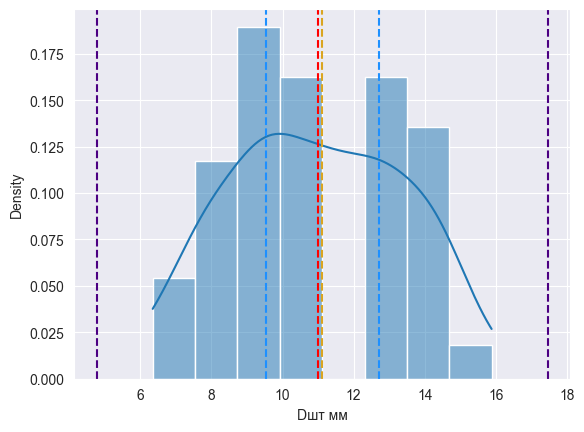

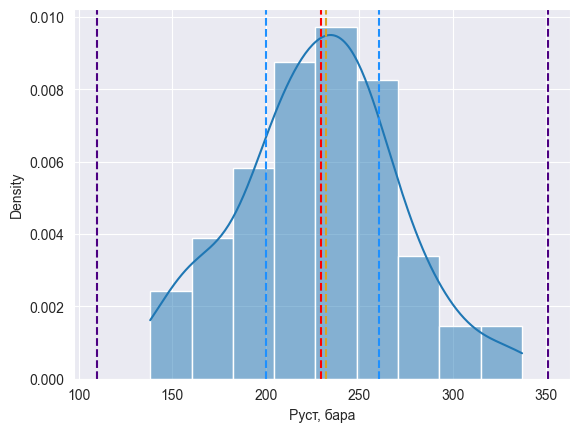

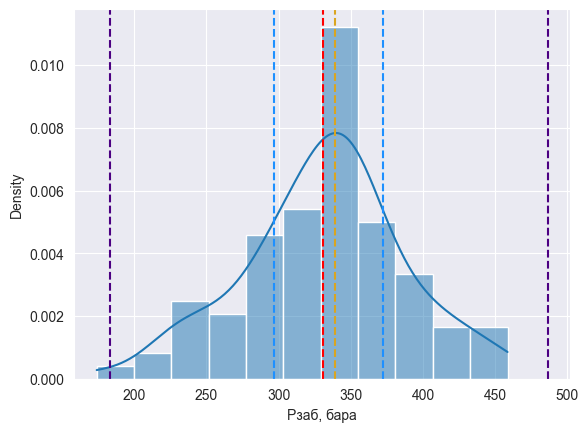

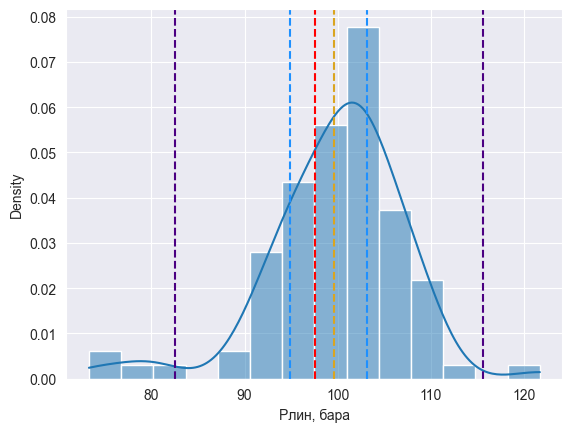

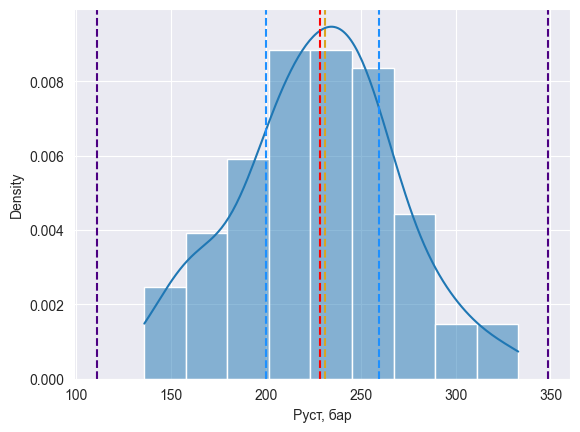

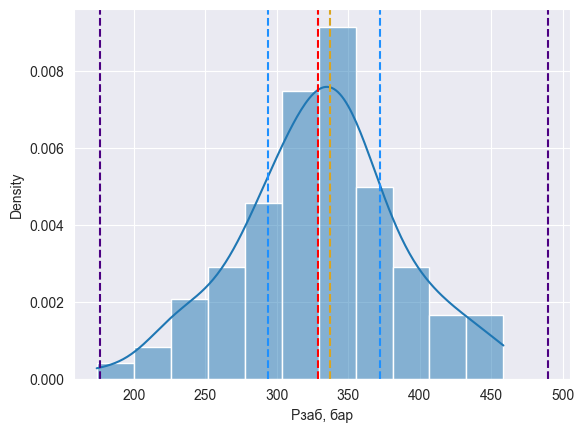

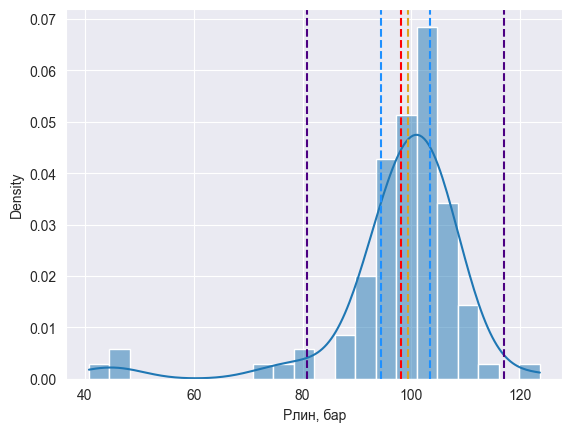

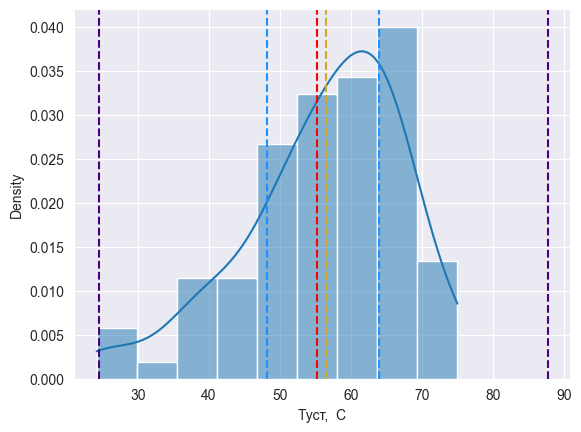

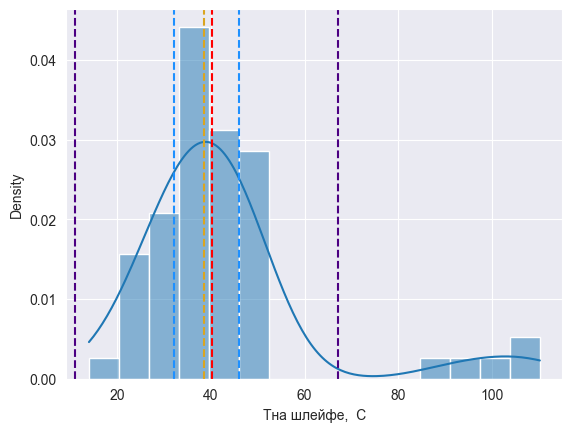

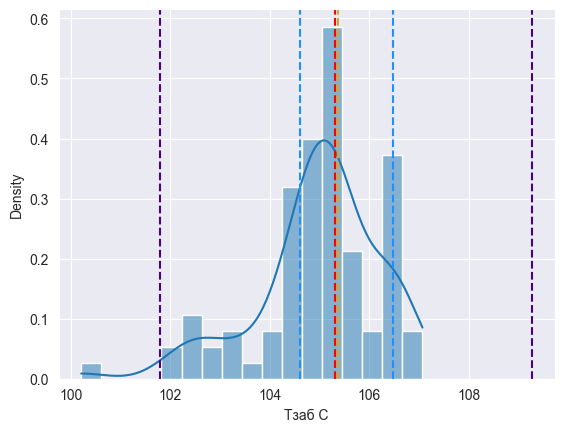

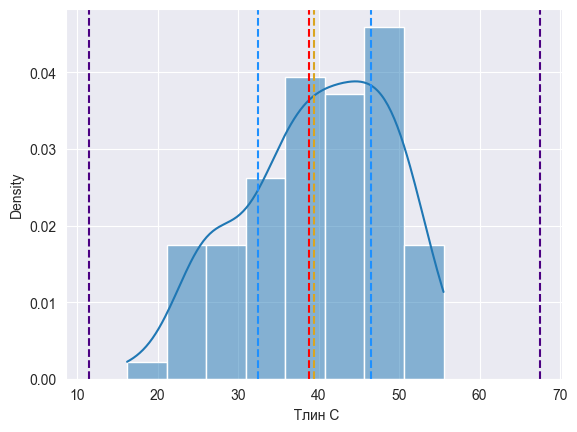

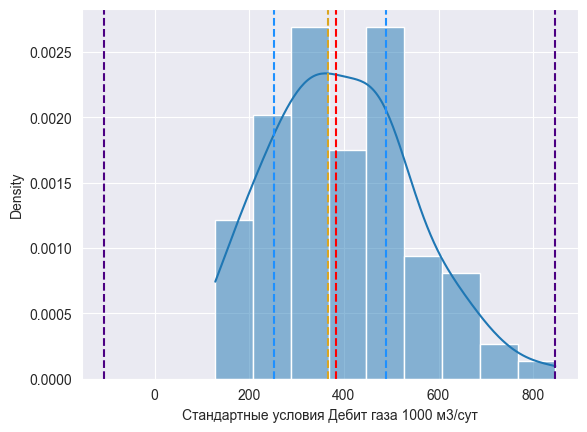

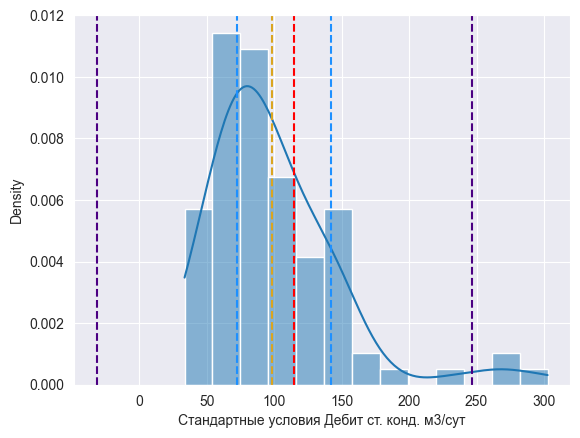

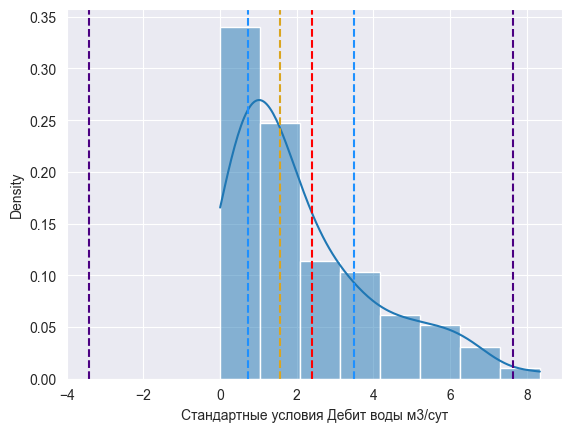

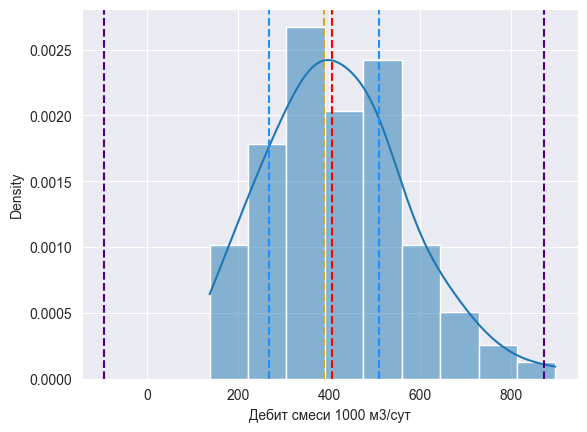

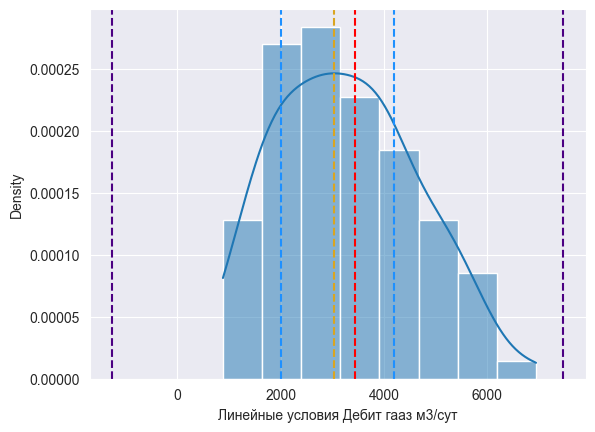

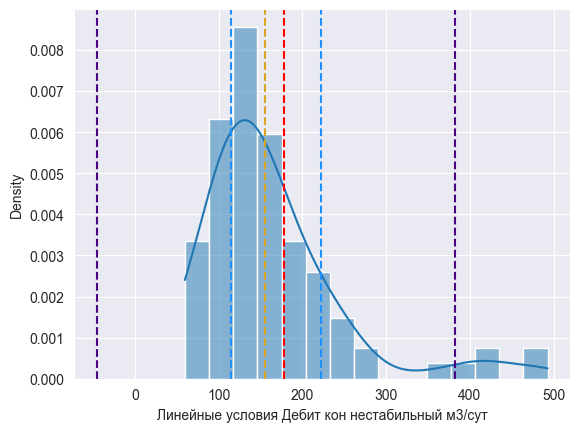

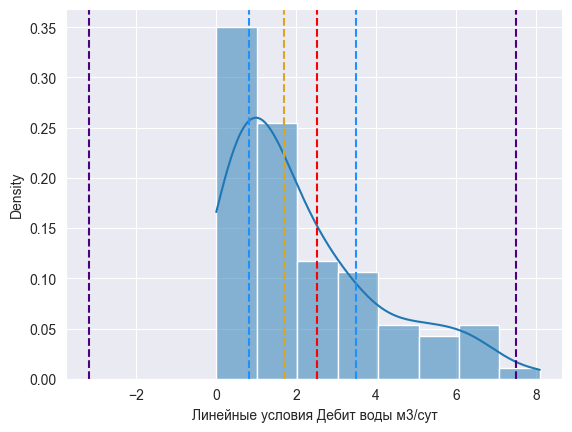

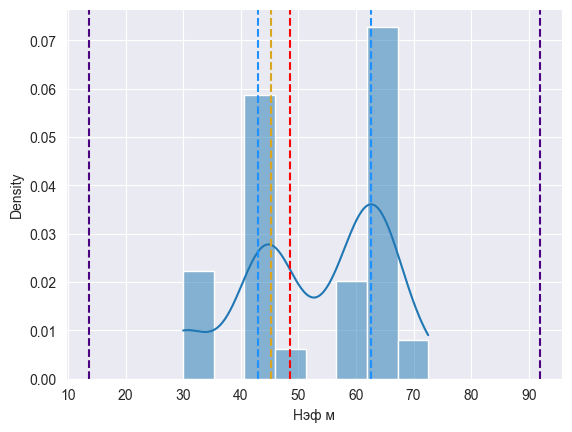

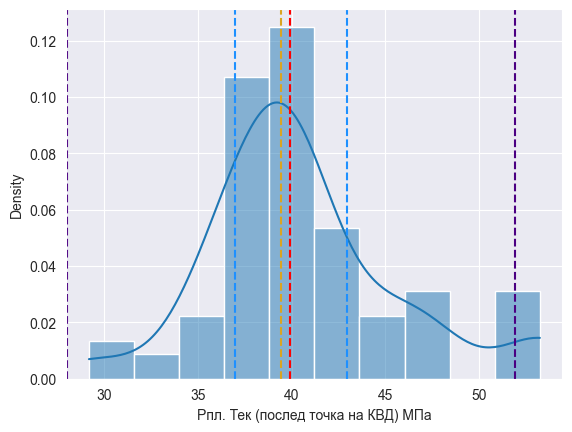

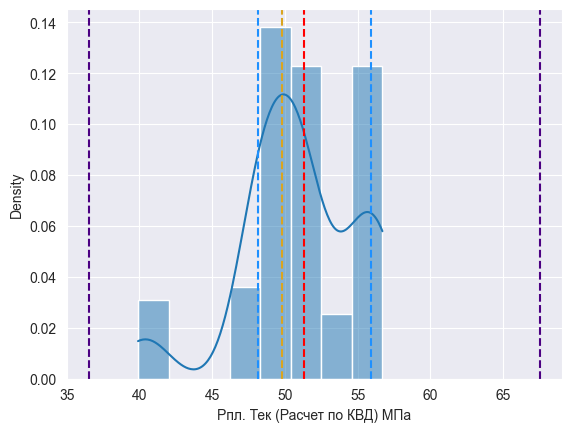

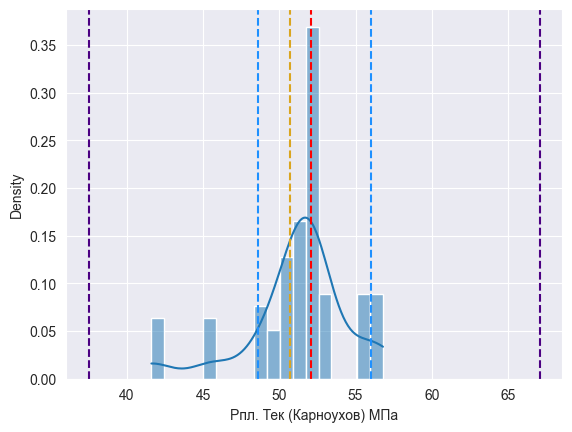

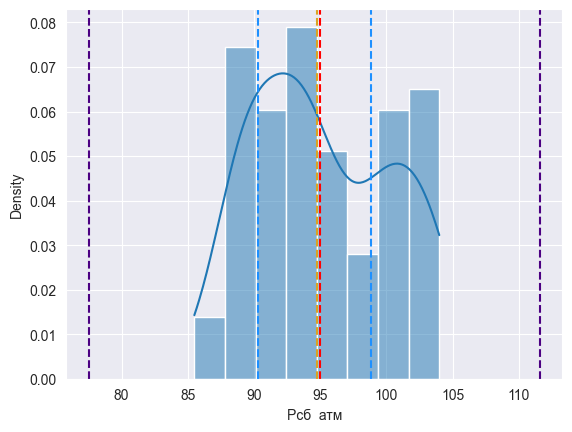

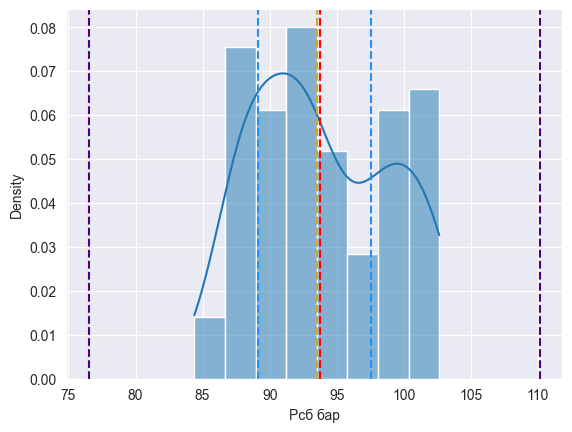

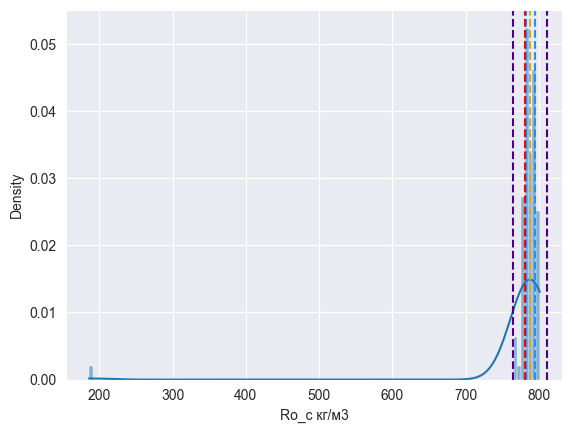

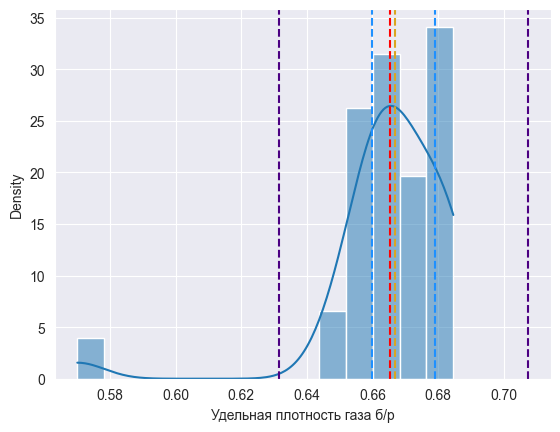

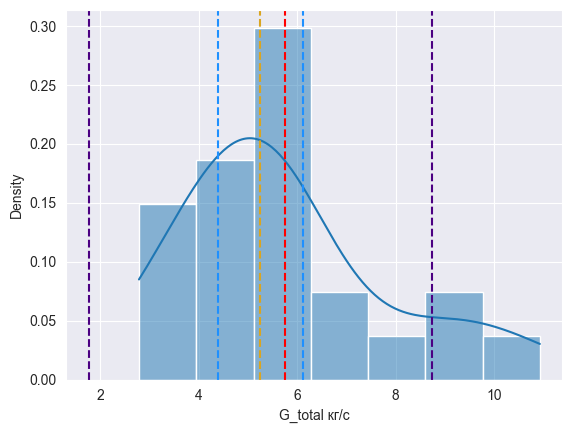

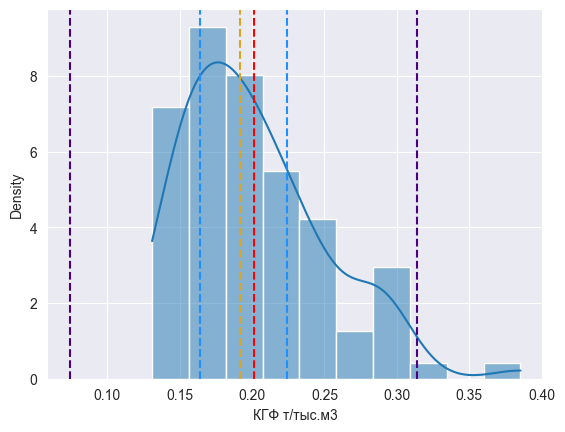

In [63]:
distribution_visualizer()

# Анализ тепловой карты

C:\Users\egork\AppData\Local\Temp\ipykernel_10520\1246008313.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidths=1, cbar=False)


<Axes: >

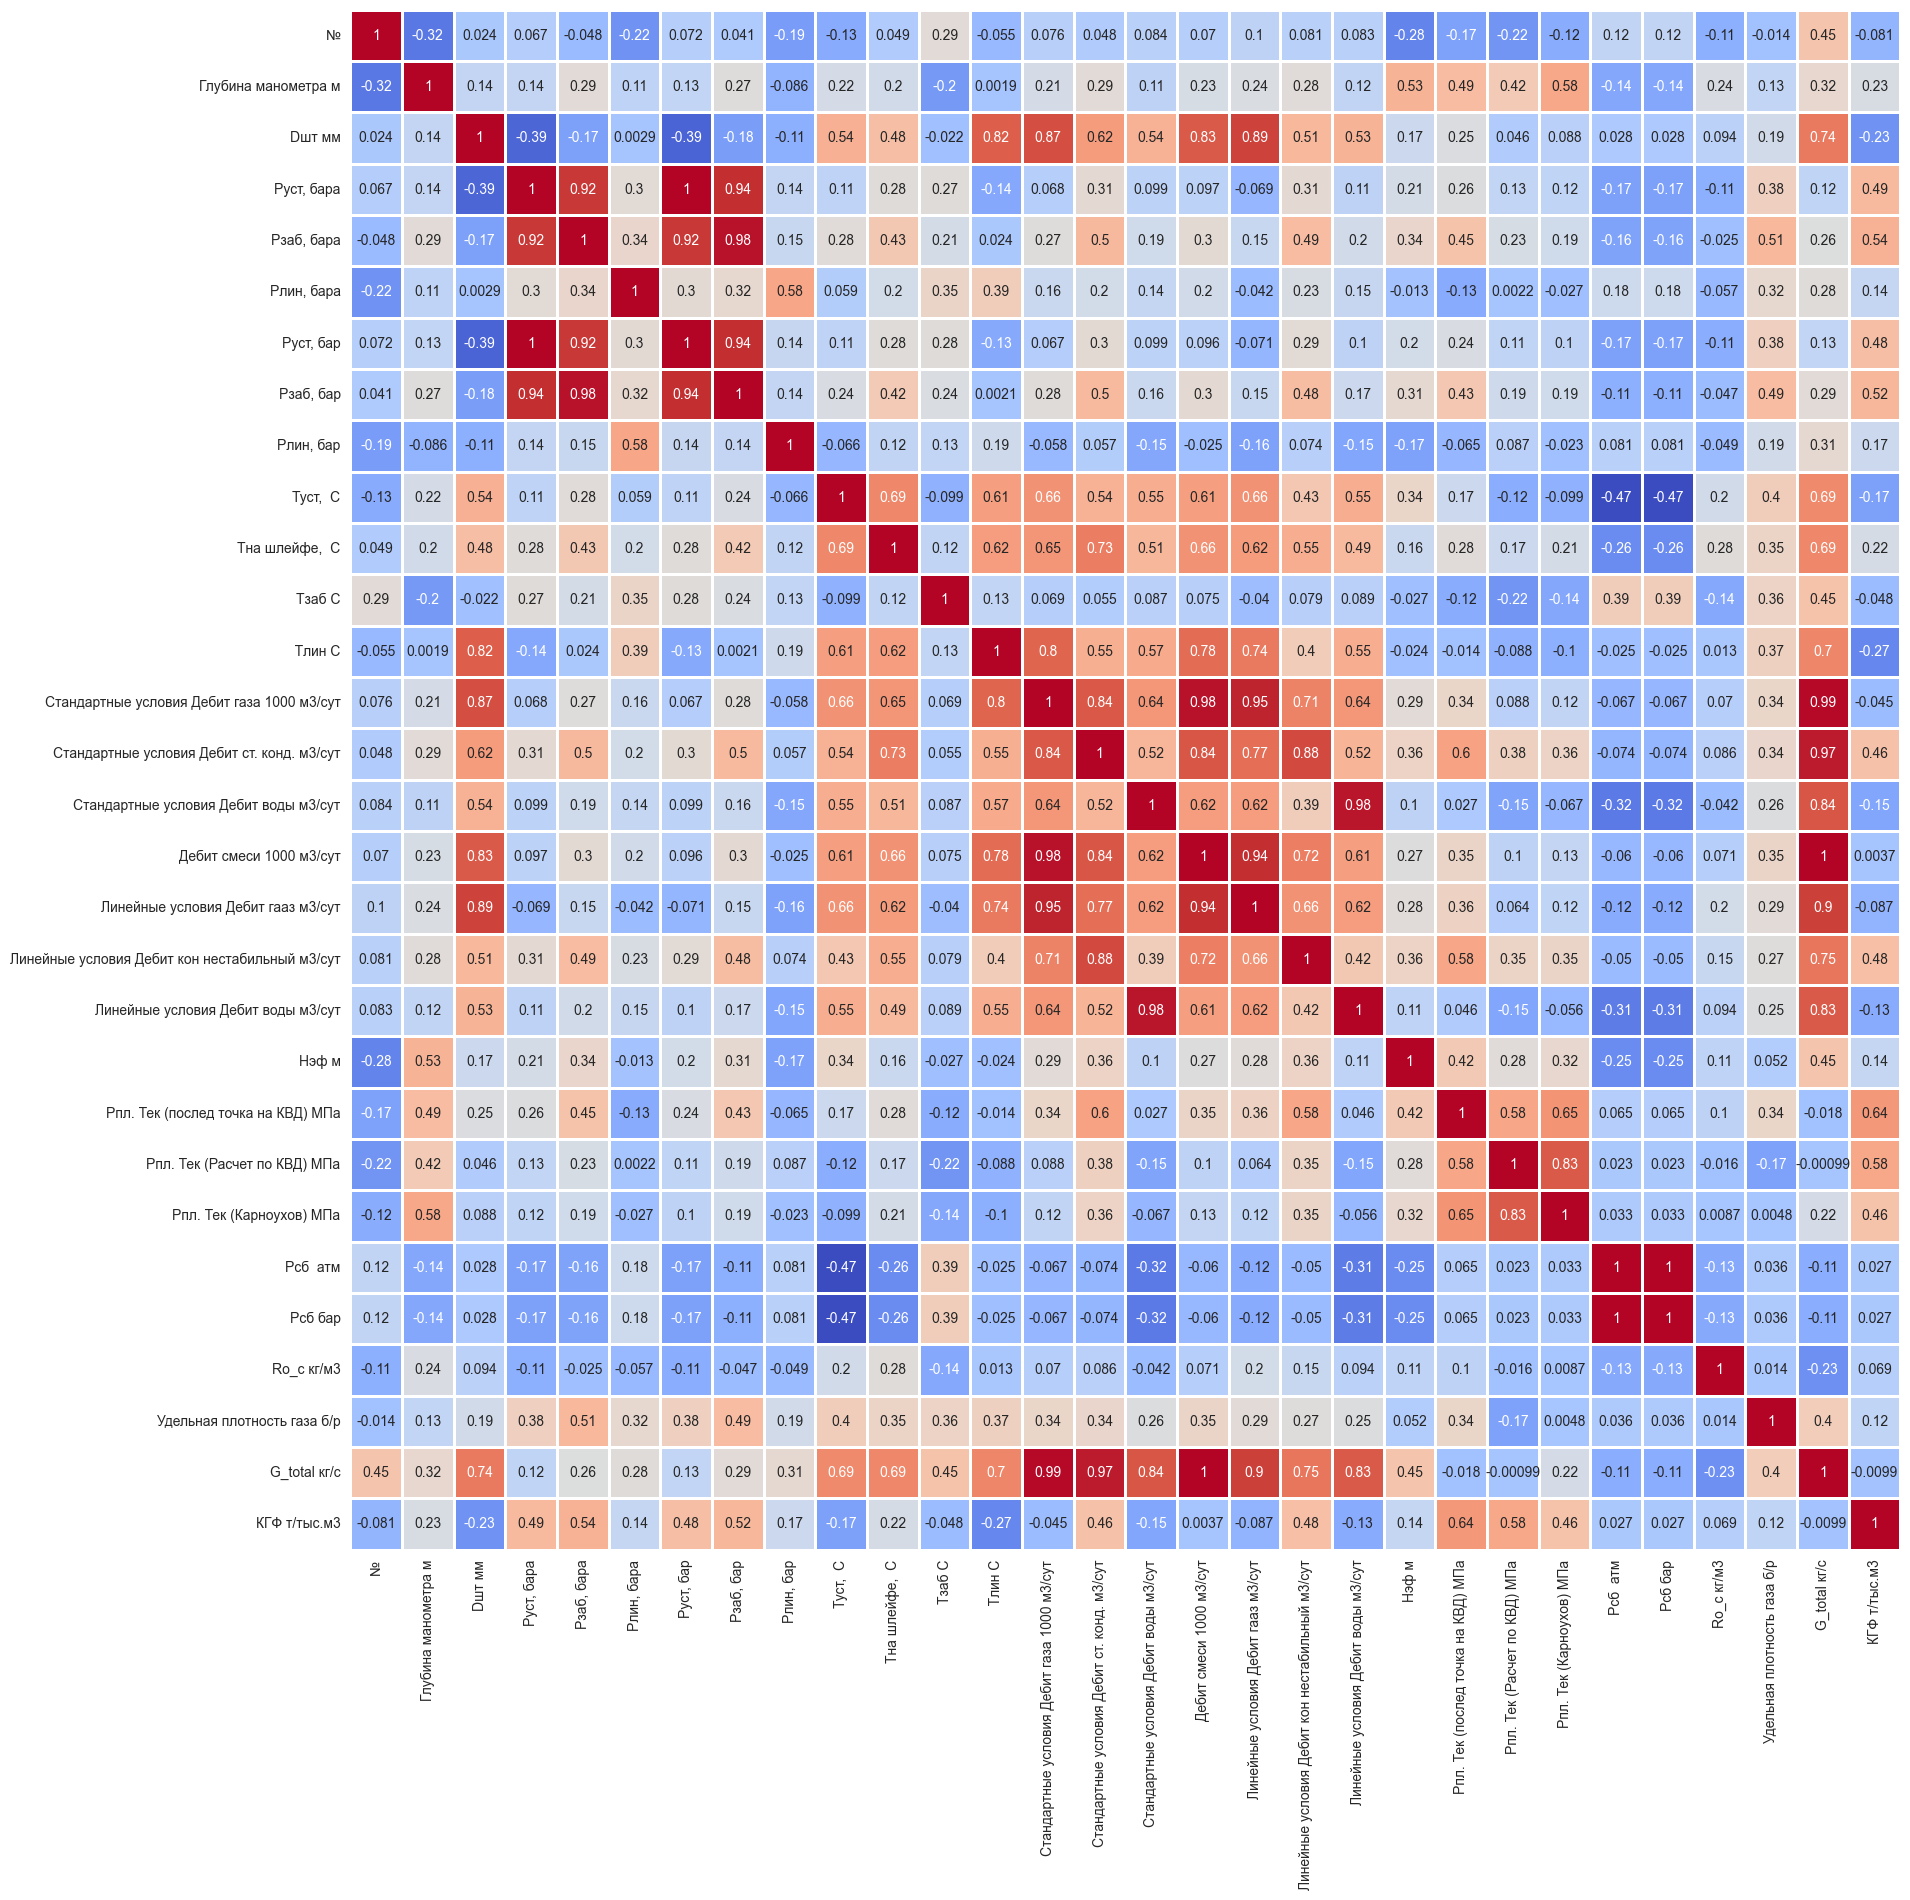

In [64]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidths=1, cbar=False)

Рзаб, бар - Рзаб, бара. Оставляем первого
Дебит смеси 1000 - Стандартные условия дебита газа. Оставляем первого

удалить сильные кореляции, добавить филнальное gain ratio